# K均值聚类

机器学习模型还可以将训练集中的数据划分为若干个组，每个组被称为一个“簇（cluster）”。这些自动形成的簇，可能对应着不同的潜在概念，例如“篮球苗子”、“长跑苗子”。这种学习方式被称为“聚类（clusting）”，它的重要特点是在学习过程中不需要用标签对训练样本进行标注。也就是说，学习过程能够根据现有训练集自动完成分类（聚类）。

## 基本原理

K均值聚类是一种将输入数据划分为k个簇的简单的聚类算法，该算法不断提取当前分类的中心点（也称为质心或重心），并最终在分类稳定时完成聚类。从本质上说，K均值聚类是一种迭代算法。

K均值聚类算法的基本步骤如下：

1．随机选取k个点作为分类的中心点。

2．将每个数据点放到距离它最近的中心点所在的类中。

3．重新计算各个分类的数据点的平均值，将该平均值作为新的分类中心点。

4．重复步骤2和步骤3，直到分类稳定。

# OpenCV示例

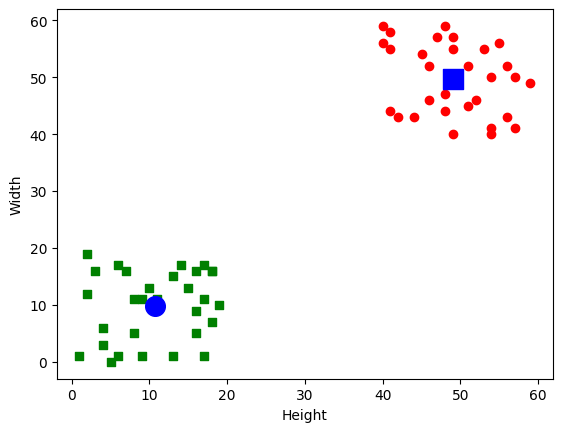

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
# 随机生成两组数值
# xiaomi组，长和宽都在[0,20]内
xiaomi = np.random.randint(0,20, (30,2))
#dami组，长和宽的大小都在[40,60]
dami = np.random.randint(40,60, (30,2))
# 组合数据
MI = np.vstack((xiaomi, dami))
# 转换为float32类型
MI = np.float32(MI)
# 调用kmeans模块
# 设置参数criteria值
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
# 调用kmeans函数
ret, label, center=cv2.kmeans(MI,2, None, criteria,10, cv2.KMEANS_RANDOM_CENTERS)
'''
#打印返回值
print(ret)
print(label)
print(center)
'''
# 根据kmeans的处理结果，将数据分类，分为XM和DM两大类
XM = MI[label.ravel()==0]
DM = MI[label.ravel()==1]
# 绘制分类结果数据及中心点
plt.scatter(XM[:,0], XM[:,1], c = 'g', marker = 's')
plt.scatter(DM[:,0], DM[:,1], c = 'r', marker = 'o')
plt.scatter(center[0,0], center[0,1], s = 200, c = 'b', marker = 'o')
plt.scatter(center[1,0], center[1,1], s = 200, c = 'b', marker = 's')
plt.xlabel('Height'), plt.ylabel('Width')
plt.show()